In [5]:
"""
This notebook will be exploring the distribution of vehicles traveling the BQE pre/post Weigh In Motion Enforcement.
We seek to determine if there was a statistically significant change in the volume of traffic/ type of traffic traversing the BQE.
"""

'\nThis notebook will be exploring the distribution of vehicles traveling the BQE pre/post Weigh In Motion Enforcement.\nWe seek to determine if there was a statistically significant change in the volume of traffic/ type of traffic traversing the BQE.\n'

In [6]:
import pandas as pd

Seperating Pre-Enforcement and Post-Enforcement Data

In [7]:
#Queens Bound , 2019 - 2023
df = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_19_23.csv")

In [8]:
#Applying function to each row to create new column from year, month, day with format YYYYMMDD for the purpose of ordering data
def create_year_month_day(row):
    return f"{row['year']}{row['month']:02d}{row['day']:02d}"

df['year_month_day'] = df.apply(create_year_month_day, axis=1)

df

direction  year  month  day  class  class_count year_month_day
0            QB    23      1   27     13           34         230127
1            QB    23      8   24     14          119         230824
2            QB    23      3   20      6          763         230320
3            QB    23     12   11      5         3107         231211
4            QB    23     10   25      4          227         231025
...         ...   ...    ...  ...    ...          ...            ...
18004        QB    19     11   14     12            1         191114
18005        QB    19     12   17     12            3         191217
18006        QB    19     10   19     12            1         191019
18007        QB    19     12   26     12            2         191226
18008        QB    19     11   24     12            1         191124

[18009 rows x 7 columns]

In [9]:
df["year_month_day"] = df["year_month_day"].astype(int)
df = df.sort_values("year_month_day", ascending=True)
# Queens Bound WIM enforcement began Novemeber 13, 2023

df = df.reset_index(drop=True)

In [10]:
#Filtering Pre/Post Enforcement Nov. 13, 2023
pre_enforcement_df1 = df[df["year_month_day"] < 231113]
post_enforcement_df1 = df[df["year_month_day"] >= 231113]

In [11]:
pre_enforcement_df1 #QB Daily Traffic Count Pre-enforcement 2019 - 2023

direction  year  month  day  class  class_count  year_month_day
0            QB    19     10   16      5         1969          191016
1            QB    19     10   16     12            2          191016
2            QB    19     10   16     13            7          191016
3            QB    19     10   16      9         1866          191016
4            QB    19     10   16      3         7056          191016
...         ...   ...    ...  ...    ...          ...             ...
17353        QB    23     11   12      3         4261          231112
17354        QB    23     11   12      9          487          231112
17355        QB    23     11   12      6           90          231112
17356        QB    23     11   12      5         1032          231112
17357        QB    23     11   12      7           26          231112

[17358 rows x 7 columns]

In [12]:
post_enforcement_df1 #QB Daily Traffic Count Post-enforcement 2019 - 2023

direction  year  month  day  class  class_count  year_month_day
17358        QB    23     11   13      4          208          231113
17359        QB    23     11   13     11           20          231113
17360        QB    23     11   13      9         1554          231113
17361        QB    23     11   13      2        33659          231113
17362        QB    23     11   13      6          713          231113
...         ...   ...    ...  ...    ...          ...             ...
18004        QB    23     12   31      4          131          231231
18005        QB    23     12   31      3         3514          231231
18006        QB    23     12   31      5          866          231231
18007        QB    23     12   31      8           49          231231
18008        QB    23     12   31      6           66          231231

[651 rows x 7 columns]

In [13]:
df2 = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_24_25.csv")

df2

direction  year  month  day  class  class_count
0           QB    24      6   11      2        30297
1           QB    24      2   15      3         6536
2           QB    24      3   17      3         3864
3           QB    24      2   26      6          644
4           QB    24      4   25      4          366
...        ...   ...    ...  ...    ...          ...
5772        QB    25      1   16     13            1
5773        QB    25      2    2     14            1
5774        QB    25      1   30     14            1
5775        QB    25      3   26     14            2
5776        QB    25      1   12     12            5

[5777 rows x 6 columns]

In [14]:
df2['year_month_day'] = df2.apply(create_year_month_day, axis=1)

df2

direction  year  month  day  class  class_count year_month_day
0           QB    24      6   11      2        30297         240611
1           QB    24      2   15      3         6536         240215
2           QB    24      3   17      3         3864         240317
3           QB    24      2   26      6          644         240226
4           QB    24      4   25      4          366         240425
...        ...   ...    ...  ...    ...          ...            ...
5772        QB    25      1   16     13            1         250116
5773        QB    25      2    2     14            1         250202
5774        QB    25      1   30     14            1         250130
5775        QB    25      3   26     14            2         250326
5776        QB    25      1   12     12            5         250112

[5777 rows x 7 columns]

In [15]:
df2["year_month_day"] = df2["year_month_day"].astype(int)
df2 = df2.sort_values("year_month_day", ascending=True)
df2 = df2.reset_index(drop=True)

In [16]:
df2

direction  year  month  day  class  class_count  year_month_day
0           QB    24      1    1      1           38          240101
1           QB    24      1    1     14            7          240101
2           QB    24      1    1      7            8          240101
3           QB    24      1    1      5          797          240101
4           QB    24      1    1     12            9          240101
...        ...   ...    ...  ...    ...          ...             ...
5772        QB    25      3   31      9          711          250331
5773        QB    25      3   31      8           87          250331
5774        QB    25      3   31     11            9          250331
5775        QB    25      3   31      3         2016          250331
5776        QB    25      3   31      5         1872          250331

[5777 rows x 7 columns]

In [17]:
post_enforcement_df2 = pd.concat([post_enforcement_df1,df2], axis=0) 
#Joining Historical and Current Data to form comprehensive post-enforcement df for daily vehicle count QB.

post_enforcement_df2 = post_enforcement_df2.reset_index(drop=True)

post_enforcement_df2

direction  year  month  day  class  class_count  year_month_day
0           QB    23     11   13      4          208          231113
1           QB    23     11   13     11           20          231113
2           QB    23     11   13      9         1554          231113
3           QB    23     11   13      2        33659          231113
4           QB    23     11   13      6          713          231113
...        ...   ...    ...  ...    ...          ...             ...
6423        QB    25      3   31      9          711          250331
6424        QB    25      3   31      8           87          250331
6425        QB    25      3   31     11            9          250331
6426        QB    25      3   31      3         2016          250331
6427        QB    25      3   31      5         1872          250331

[6428 rows x 7 columns]

Pre-enforcement SI bound Data

In [99]:
df3 = pd.read_csv("./Data/Daily_Vehicle_Count/SIB_daily_vehicle_count_19_23.csv")

df3

direction  year  month  day  class  class_count
0          SIB    20      5   10      2        34801
1          SIB    20      1   12      2        57089
2          SIB    20      4   26      2        24158
3          SIB    20      7   29      3         8089
4          SIB    20      7   16      2        40987
...        ...   ...    ...  ...    ...          ...
5685       SIB    19     11    3      7            2
5686       SIB    19     11   24     13            1
5687       SIB    19     11   30     12            1
5688       SIB    19     12   29     12            1
5689       SIB    19     10   20     13            1

[5690 rows x 6 columns]

In [100]:
df3['year_month_day'] = df3.apply(create_year_month_day, axis=1)

df3

direction  year  month  day  class  class_count year_month_day
0          SIB    20      5   10      2        34801         200510
1          SIB    20      1   12      2        57089         200112
2          SIB    20      4   26      2        24158         200426
3          SIB    20      7   29      3         8089         200729
4          SIB    20      7   16      2        40987         200716
...        ...   ...    ...  ...    ...          ...            ...
5685       SIB    19     11    3      7            2         191103
5686       SIB    19     11   24     13            1         191124
5687       SIB    19     11   30     12            1         191130
5688       SIB    19     12   29     12            1         191229
5689       SIB    19     10   20     13            1         191020

[5690 rows x 7 columns]

In [101]:
df3["year_month_day"] = df3["year_month_day"].astype(int)
df3 = df3.sort_values("year_month_day", ascending=True)
df3 = df3.reset_index(drop=True)

df3

direction  year  month  day  class  class_count  year_month_day
0          SIB    19     10   11     12          269          191011
1          SIB    19     10   11     14         7943          191011
2          SIB    19     10   11      5         1719          191011
3          SIB    19     10   11      6          798          191011
4          SIB    19     10   11      1         2755          191011
...        ...   ...    ...  ...    ...          ...             ...
5685       SIB    20     12   31      8           72          201231
5686       SIB    20     12   31      7           13          201231
5687       SIB    20     12   31     11            2          201231
5688       SIB    20     12   31      3         3394          201231
5689       SIB    20     12   31      5          262          201231

[5690 rows x 7 columns]

Comparing Pre-enforcement Vehicle Count Distribution vs. Post-enforcement

In [2]:
import pandas as pd
#Queens Bound Traffic

pre_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
post_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")

In [3]:
pre_df

direction  year  month  day  class  class_count  \
0            QB    19     10   16      5         1969   
1            QB    19     10   16     12            2   
2            QB    19     10   16     13            7   
3            QB    19     10   16      9         1866   
4            QB    19     10   16      3         7056   
...         ...   ...    ...  ...    ...          ...   
17353        QB    23     11   12      3         4261   
17354        QB    23     11   12      9          487   
17355        QB    23     11   12      6           90   
17356        QB    23     11   12      5         1032   
17357        QB    23     11   12      7           26   

       year_month_date_type_int year_month_date  week_day  
0                        191016      2019-10-16       422  
1                        191016      2019-10-16       422  
2                        191016      2019-10-16       422  
3                        191016      2019-10-16       422  
4                        191016      2019-10-16       422  
...                         ...             ...       ...  
17353                    231112      2023-11-12       456  
17354                    231112      2023-11-12       456  
17355                    231112      2023-11-12       456  
17356                    231112      2023-11-12       456  
17357                    231112      2023-11-12       456  

[17358 rows x 9 columns]

In [4]:
post_df

direction  year  month  day  class  class_count  \
0           QB    23     11   13      4          208   
1           QB    23     11   13     11           20   
2           QB    23     11   13      9         1554   
3           QB    23     11   13      2        33659   
4           QB    23     11   13      6          713   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  week_day  
0                       231113      2023-11-13       460  
1                       231113      2023-11-13       460  
2                       231113      2023-11-13       460  
3                       231113      2023-11-13       460  
4                       231113      2023-11-13       460  
...                        ...             ...       ...  
6423                    250331      2025-03-31       140  
6424                    250331      2025-03-31       140  
6425                    250331      2025-03-31       140  
6426                    250331      2025-03-31       140  
6427                    250331      2025-03-31       140  

[6428 rows x 9 columns]

In [181]:
pre_df2 = pre_df[(pre_df["year_month_date_type_int"] >= 210331) & (pre_df["year_month_date_type_int"] < 231113)] #pre_df2 filters for 2 year period before enforcement

pre_df2

direction  year  month  day  class  class_count  \
6591         QB    21      3   31      7           59   
6592         QB    21      3   31      6          829   
6593         QB    21      3   31     12            1   
6594         QB    21      3   31     11           55   
6595         QB    21      3   31      5         2001   
...         ...   ...    ...  ...    ...          ...   
17353        QB    23     11   12      3         4261   
17354        QB    23     11   12      9          487   
17355        QB    23     11   12      6           90   
17356        QB    23     11   12      5         1032   
17357        QB    23     11   12      7           26   

       year_month_date_type_int year_month_date  week_day  
6591                     210331      2021-03-31       132  
6592                     210331      2021-03-31       132  
6593                     210331      2021-03-31       132  
6594                     210331      2021-03-31       132  
6595                     210331      2021-03-31       132  
...                         ...             ...       ...  
17353                    231112      2023-11-12       456  
17354                    231112      2023-11-12       456  
17355                    231112      2023-11-12       456  
17356                    231112      2023-11-12       456  
17357                    231112      2023-11-12       456  

[10767 rows x 9 columns]

In [182]:
import numpy as np

bool_label = pre_df2.shape[0]
pre_df2["pre_post_bool"] = np.zeros(bool_label, dtype="int")

pre_df2

C:\Users\rubie\AppData\Local\Temp\ipykernel_19504\1443356772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df2["pre_post_bool"] = np.zeros(bool_label, dtype="int")


direction  year  month  day  class  class_count  \
6591         QB    21      3   31      7           59   
6592         QB    21      3   31      6          829   
6593         QB    21      3   31     12            1   
6594         QB    21      3   31     11           55   
6595         QB    21      3   31      5         2001   
...         ...   ...    ...  ...    ...          ...   
17353        QB    23     11   12      3         4261   
17354        QB    23     11   12      9          487   
17355        QB    23     11   12      6           90   
17356        QB    23     11   12      5         1032   
17357        QB    23     11   12      7           26   

       year_month_date_type_int year_month_date  week_day  pre_post_bool  
6591                     210331      2021-03-31       132              0  
6592                     210331      2021-03-31       132              0  
6593                     210331      2021-03-31       132              0  
6594                     210331      2021-03-31       132              0  
6595                     210331      2021-03-31       132              0  
...                         ...             ...       ...            ...  
17353                    231112      2023-11-12       456              0  
17354                    231112      2023-11-12       456              0  
17355                    231112      2023-11-12       456              0  
17356                    231112      2023-11-12       456              0  
17357                    231112      2023-11-12       456              0  

[10767 rows x 10 columns]

In [183]:
bool_label = post_df.shape[0]
post_df["pre_post_bool"] = np.ones(bool_label, dtype="int")

post_df

direction  year  month  day  class  class_count  \
0           QB    23     11   13      4          208   
1           QB    23     11   13     11           20   
2           QB    23     11   13      9         1554   
3           QB    23     11   13      2        33659   
4           QB    23     11   13      6          713   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  week_day  pre_post_bool  
0                       231113      2023-11-13       460              1  
1                       231113      2023-11-13       460              1  
2                       231113      2023-11-13       460              1  
3                       231113      2023-11-13       460              1  
4                       231113      2023-11-13       460              1  
...                        ...             ...       ...            ...  
6423                    250331      2025-03-31       140              1  
6424                    250331      2025-03-31       140              1  
6425                    250331      2025-03-31       140              1  
6426                    250331      2025-03-31       140              1  
6427                    250331      2025-03-31       140              1  

[6428 rows x 10 columns]

In [28]:
#vehicle classes observed pre/post-enforcement
pre_classes = pre_df2["class"].unique().tolist()
post_classes = post_df["class"].unique().tolist()

In [29]:
pre_post_classes = [] # vehicle classes observed pre and post enforcement

temp_list = pre_classes+post_classes
for item in temp_list:
    if item not in pre_post_classes:
        pre_post_classes.append(item)

pre_post_classes 

[7, 6, 12, 11, 5, 8, 4, 3, 1, 9, 13, 10, 2, 14]

In [30]:
pre_post_classes = list(map(int, pre_post_classes))

pre_post_classes.sort()
pre_post_classes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [184]:
pre2_post2_df = pd.concat([pre_df2,post_df], axis=0)

pre2_post2_df

direction  year  month  day  class  class_count  \
6591        QB    21      3   31      7           59   
6592        QB    21      3   31      6          829   
6593        QB    21      3   31     12            1   
6594        QB    21      3   31     11           55   
6595        QB    21      3   31      5         2001   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  week_day  pre_post_bool  
6591                    210331      2021-03-31       132              0  
6592                    210331      2021-03-31       132              0  
6593                    210331      2021-03-31       132              0  
6594                    210331      2021-03-31       132              0  
6595                    210331      2021-03-31       132              0  
...                        ...             ...       ...            ...  
6423                    250331      2025-03-31       140              1  
6424                    250331      2025-03-31       140              1  
6425                    250331      2025-03-31       140              1  
6426                    250331      2025-03-31       140              1  
6427                    250331      2025-03-31       140              1  

[17195 rows x 10 columns]

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

Vehicle Class 1

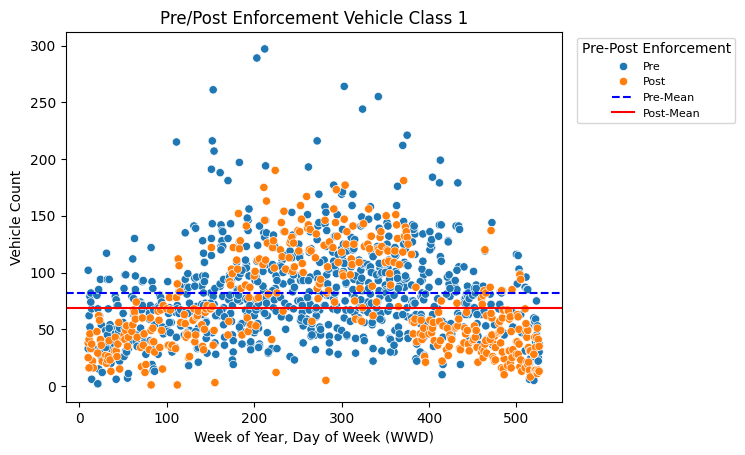

In [298]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 1] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 1")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [299]:
#Week of year 1-53
#Day of week encoded 0-6 (Monday - Sunday)

In [300]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    835.000000
mean      82.004790
std       40.661585
min        2.000000
25%       54.000000
50%       77.000000
75%      102.000000
max      297.000000
Name: class_count, dtype: float64

In [301]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    409.000000
mean      68.603912
std       41.426578
min        1.000000
25%       36.000000
50%       57.000000
75%      103.000000
max      190.000000
Name: class_count, dtype: float64

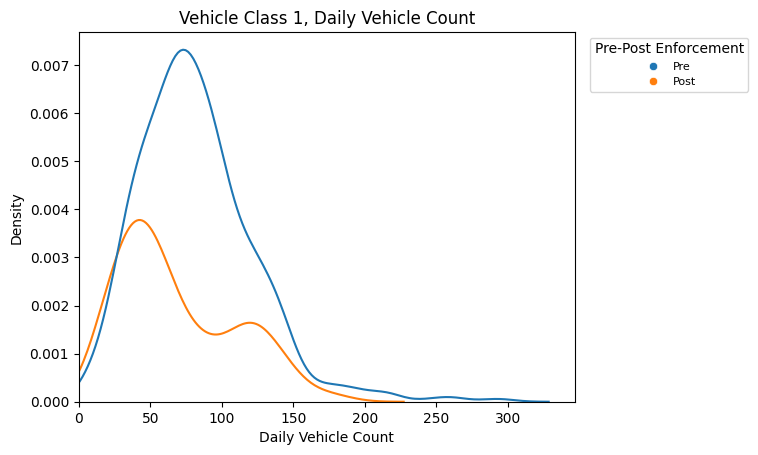

In [302]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 1, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [303]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""


KS Statistic: 0.239992386864413
P-value: 2.2239681206047113e-14


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 2

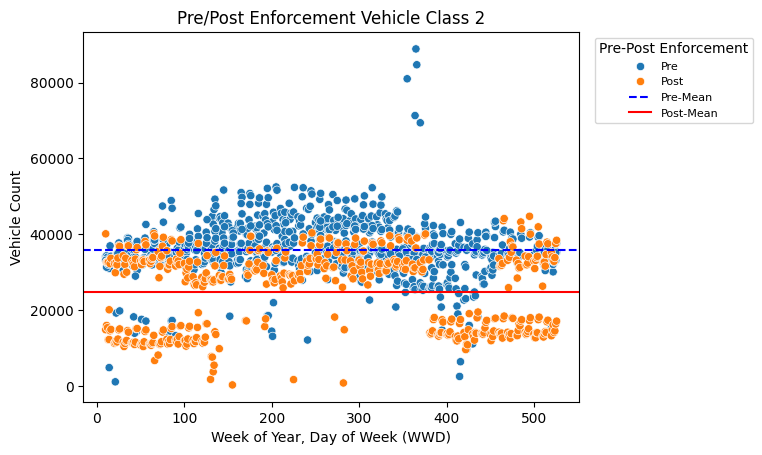

In [304]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 2] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 2")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [305]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count      835.000000
mean     36006.611976
std       7815.642247
min       1202.000000
25%      32781.000000
50%      35515.000000
75%      40408.500000
max      88846.000000
Name: class_count, dtype: float64

In [306]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count      497.000000
mean     24928.696177
std      10182.195216
min        385.000000
25%      14195.000000
50%      28705.000000
75%      33020.000000
max      44783.000000
Name: class_count, dtype: float64

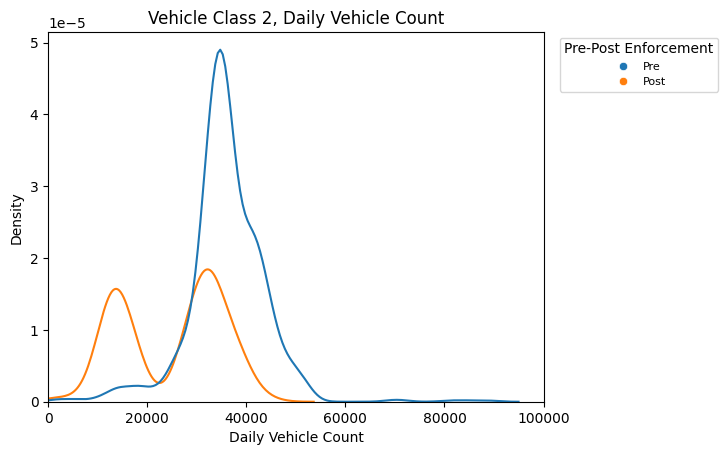

In [307]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 2, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [308]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.4940734225713563
P-value: 1.1118421428468338e-69


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 3

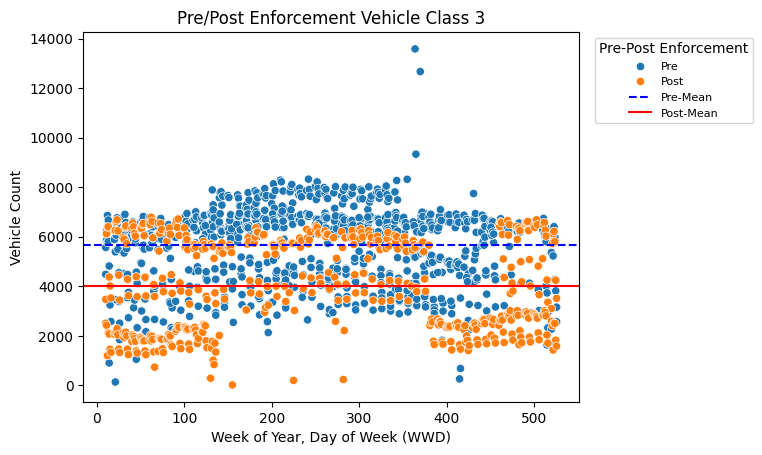

In [309]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 3] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 3")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [310]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count      835.000000
mean      5653.308982
std       1569.585323
min        137.000000
25%       4486.000000
50%       6187.000000
75%       6700.000000
max      13580.000000
Name: class_count, dtype: float64

In [311]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     497.000000
mean     4006.020121
std      1824.326107
min        20.000000
25%      2322.000000
50%      3876.000000
75%      5812.000000
max      6790.000000
Name: class_count, dtype: float64

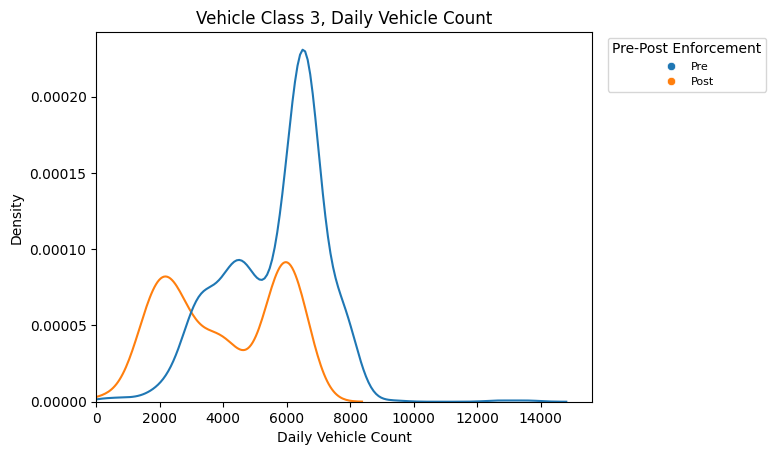

In [312]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 3, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [313]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.3666044169206858
P-value: 8.638561037319604e-38


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 4

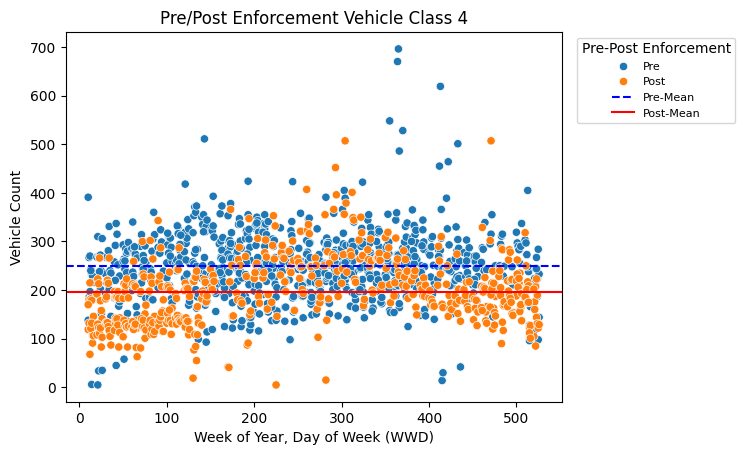

In [314]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 4] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 4")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [315]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    835.000000
mean     249.510180
std       71.143256
min        5.000000
25%      209.000000
50%      250.000000
75%      289.500000
max      696.000000
Name: class_count, dtype: float64

In [316]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    496.000000
mean     195.429435
std       69.348272
min        5.000000
25%      142.000000
50%      189.500000
75%      233.500000
max      507.000000
Name: class_count, dtype: float64

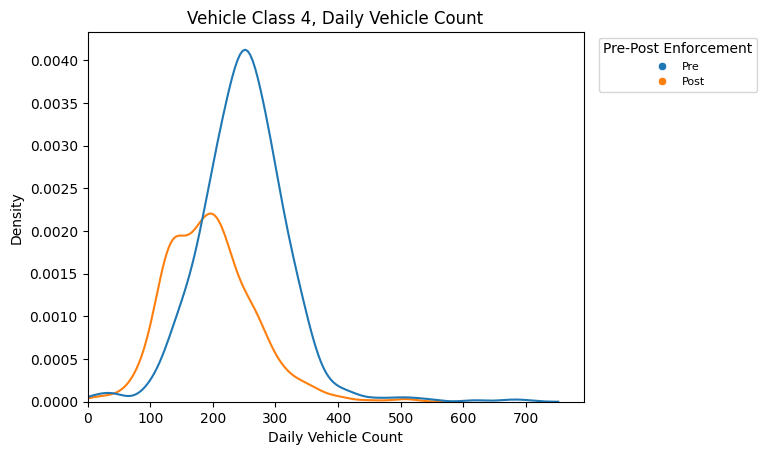

In [317]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 4, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [318]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.3797155688622755
P-value: 1.5979598322966847e-40


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 5

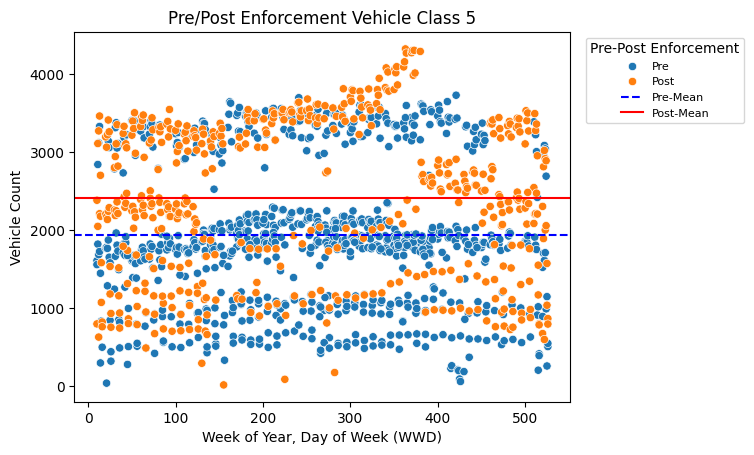

In [319]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 5] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 5")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [320]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     835.000000
mean     1941.994012
std       928.828923
min        37.000000
25%      1157.000000
50%      1854.000000
75%      2473.000000
max      3732.000000
Name: class_count, dtype: float64

In [321]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     497.000000
mean     2407.674044
std       992.606035
min        14.000000
25%      1537.000000
50%      2430.000000
75%      3297.000000
max      4326.000000
Name: class_count, dtype: float64

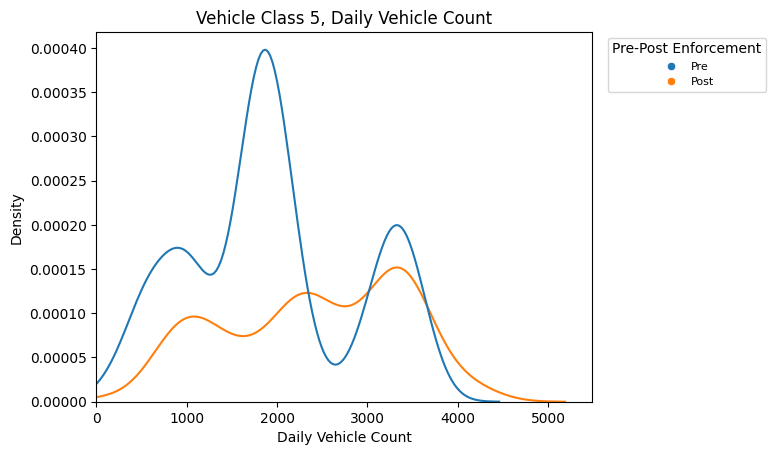

In [322]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 5, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [323]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.3587850456029591
P-value: 3.594819579970782e-36


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 6

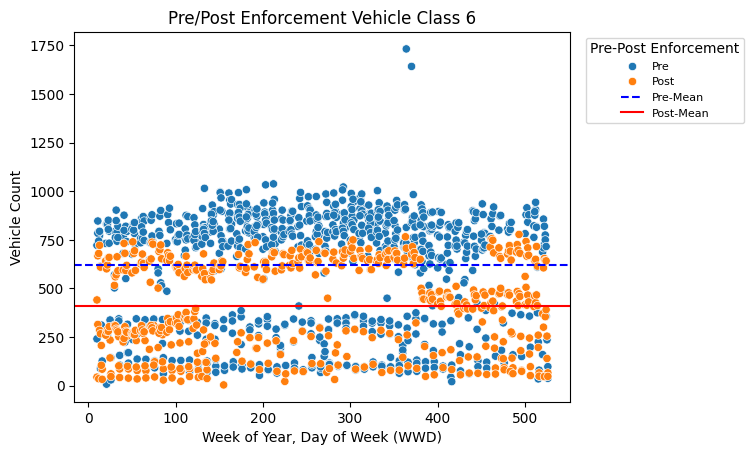

In [324]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 6] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 6")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [325]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     835.000000
mean      618.749701
std       297.678300
min         8.000000
25%       333.000000
50%       749.000000
75%       838.000000
max      1732.000000
Name: class_count, dtype: float64

In [326]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    497.000000
mean     408.678068
std      229.777059
min        4.000000
25%      218.000000
50%      423.000000
75%      636.000000
max      778.000000
Name: class_count, dtype: float64

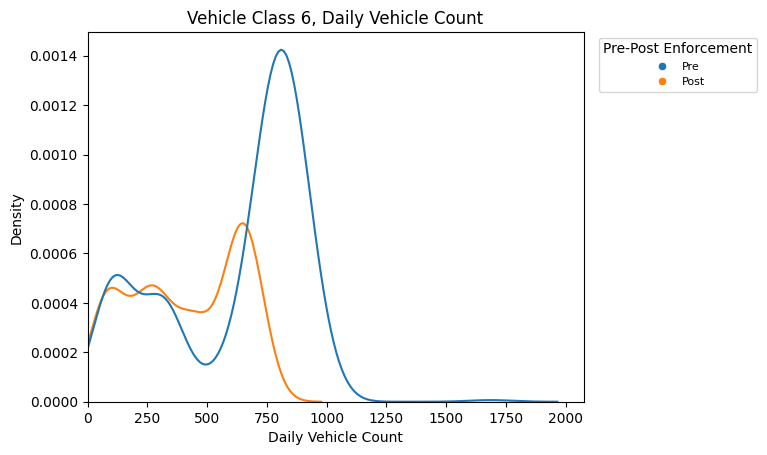

In [327]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 6, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [328]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.5460571814118242
P-value: 5.804328374369113e-86


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 7

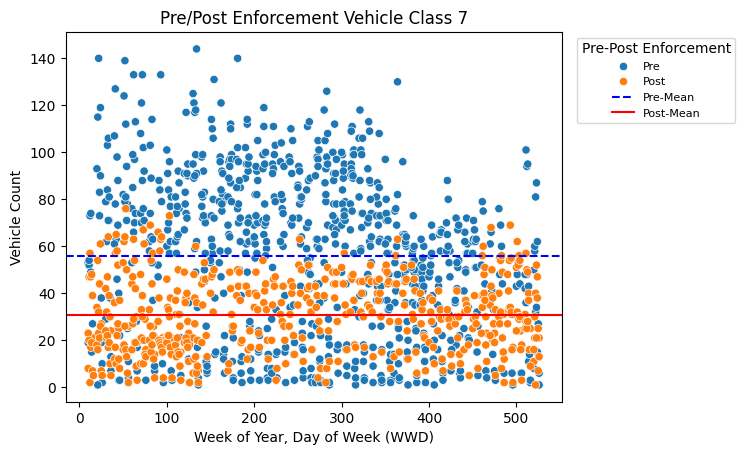

In [329]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 7] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 7")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [330]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    827.000000
mean      55.698912
std       33.686204
min        1.000000
25%       24.500000
50%       60.000000
75%       81.000000
max      144.000000
Name: class_count, dtype: float64

In [331]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    496.000000
mean      30.614919
std       15.847216
min        1.000000
25%       18.000000
50%       30.000000
75%       43.000000
max       76.000000
Name: class_count, dtype: float64

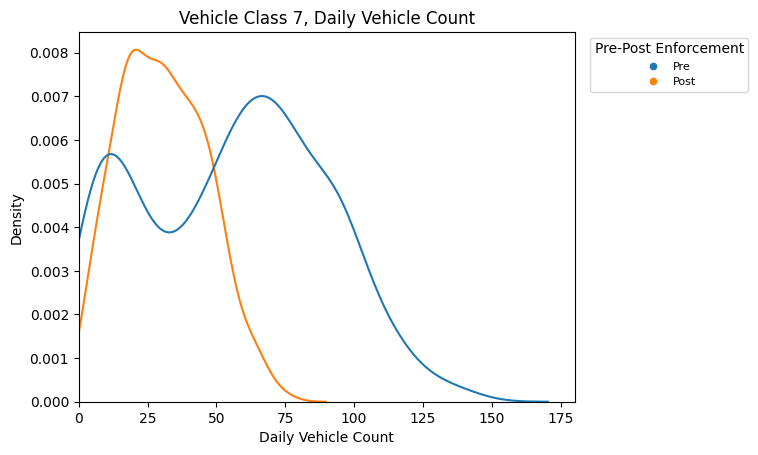

In [332]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 7, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [333]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.47921948745953113
P-value: 4.0636423276539975e-65


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 8

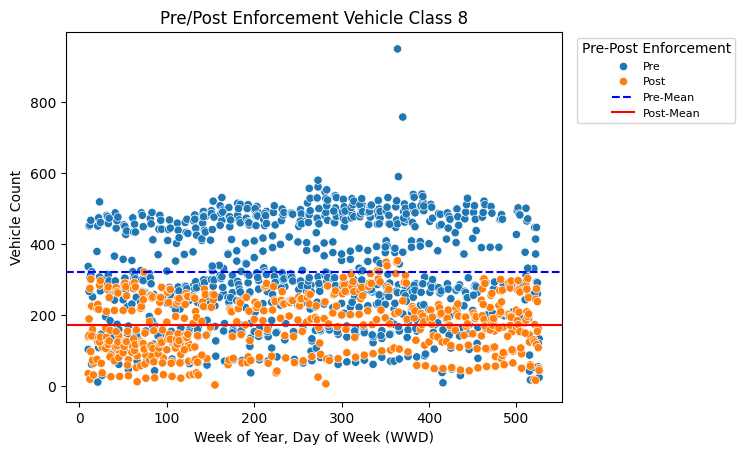

In [334]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 8] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 8")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [335]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    835.000000
mean     320.646707
std      142.012922
min        9.000000
25%      222.500000
50%      299.000000
75%      462.500000
max      950.000000
Name: class_count, dtype: float64

In [336]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    497.000000
mean     171.851107
std       79.886398
min        3.000000
25%      107.000000
50%      175.000000
75%      238.000000
max      353.000000
Name: class_count, dtype: float64

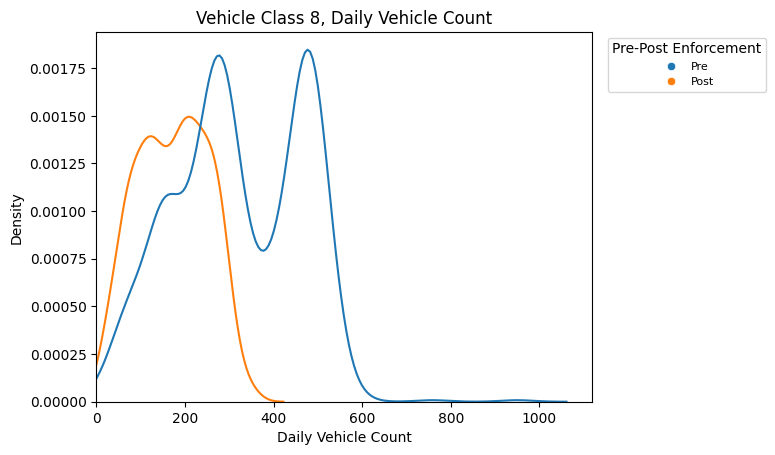

In [337]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 8, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [338]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.5089266135736575
P-value: 3.912269159741295e-74


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 9

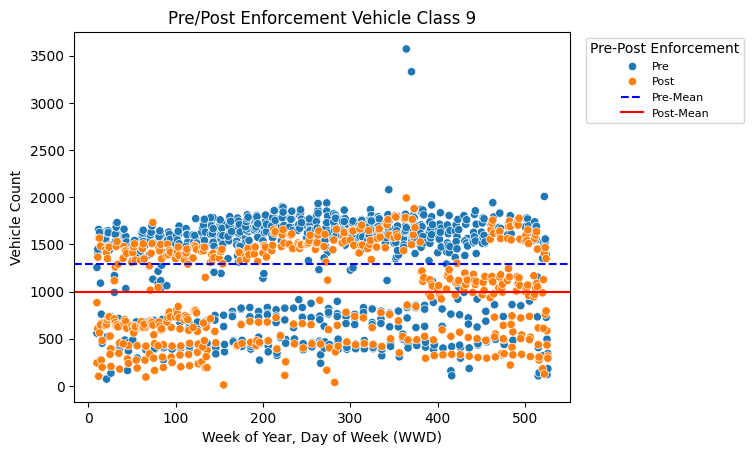

In [339]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 9] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 9")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [340]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     835.000000
mean     1289.754491
std       529.171211
min        72.000000
25%       750.000000
50%      1548.000000
75%      1673.000000
max      3572.000000
Name: class_count, dtype: float64

In [341]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     497.000000
mean      991.901408
std       487.356286
min        10.000000
25%       573.000000
50%      1031.000000
75%      1457.000000
max      1992.000000
Name: class_count, dtype: float64

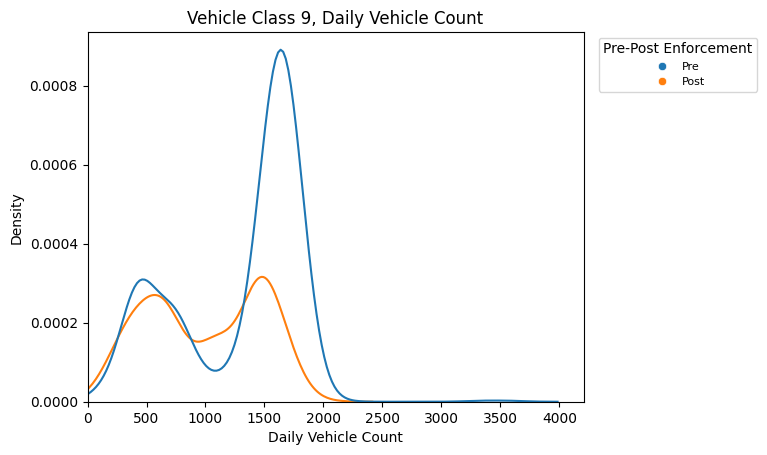

In [342]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 9, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [343]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.3975011747129483
P-value: 1.5482307626225167e-44


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 10

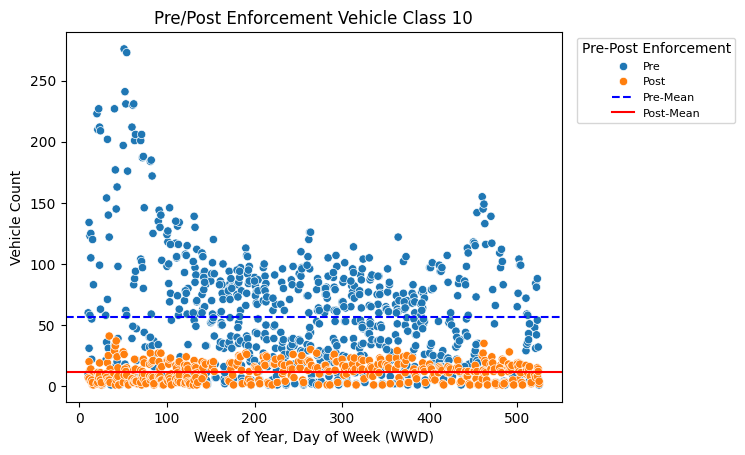

In [344]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 10] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 10")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [345]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    796.000000
mean      56.737437
std       46.796335
min        1.000000
25%       19.750000
50%       51.000000
75%       83.000000
max      276.000000
Name: class_count, dtype: float64

In [346]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    455.000000
mean      11.758242
std        7.706826
min        1.000000
25%        5.000000
50%       12.000000
75%       17.000000
max       41.000000
Name: class_count, dtype: float64

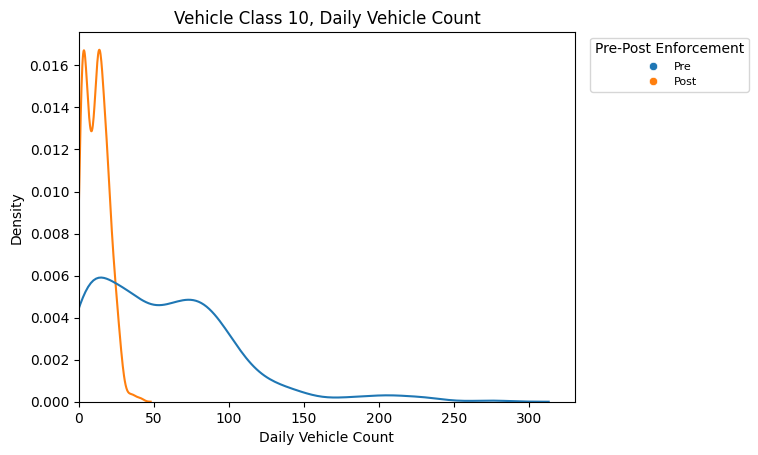

In [347]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 10, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [348]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.6567259373792037
P-value: 7.386213405601246e-119


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 11

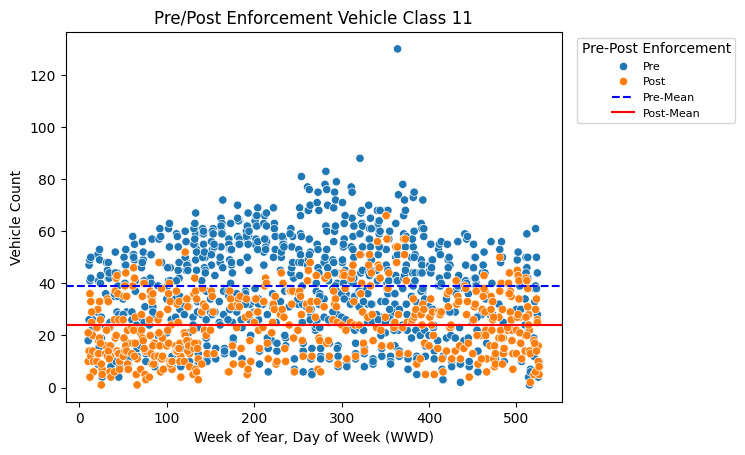

In [349]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 11] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 11")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [350]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    834.000000
mean      38.833333
std       18.327677
min        1.000000
25%       25.000000
50%       40.000000
75%       53.000000
max      130.000000
Name: class_count, dtype: float64

In [351]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    495.000000
mean      23.967677
std       12.328950
min        1.000000
25%       14.000000
50%       23.000000
75%       33.500000
max       66.000000
Name: class_count, dtype: float64

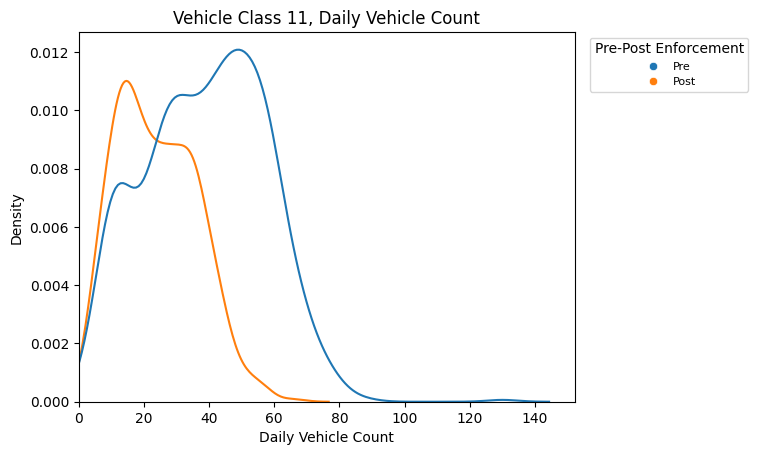

In [352]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 11, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [353]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.39790712884238066
P-value: 1.7096439837478252e-44


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 12

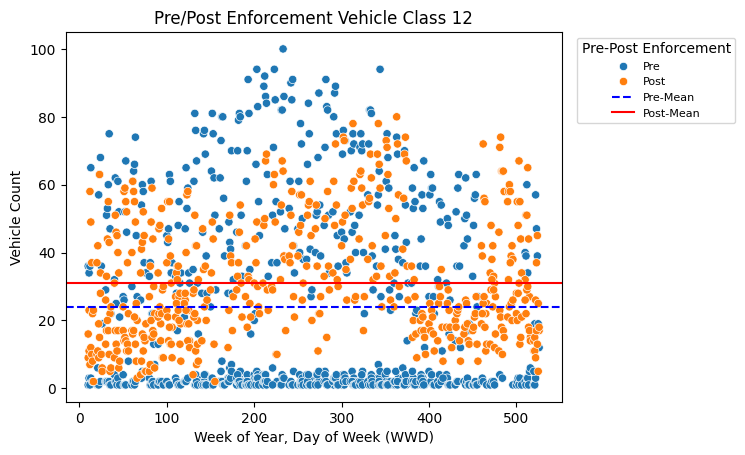

In [354]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 12] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 12")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [355]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    685.000000
mean      23.862774
std       27.680009
min        1.000000
25%        2.000000
50%        4.000000
75%       46.000000
max      100.000000
Name: class_count, dtype: float64

In [356]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    495.000000
mean      31.171717
std       17.714698
min        2.000000
25%       17.000000
50%       27.000000
75%       44.000000
max       80.000000
Name: class_count, dtype: float64

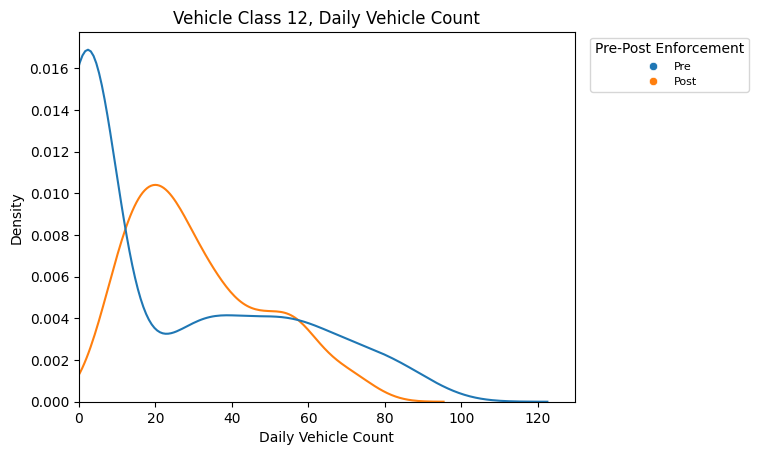

In [357]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 12, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [358]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.5091646390916464
P-value: 1.992598134223022e-68


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

Vehicle Class 13

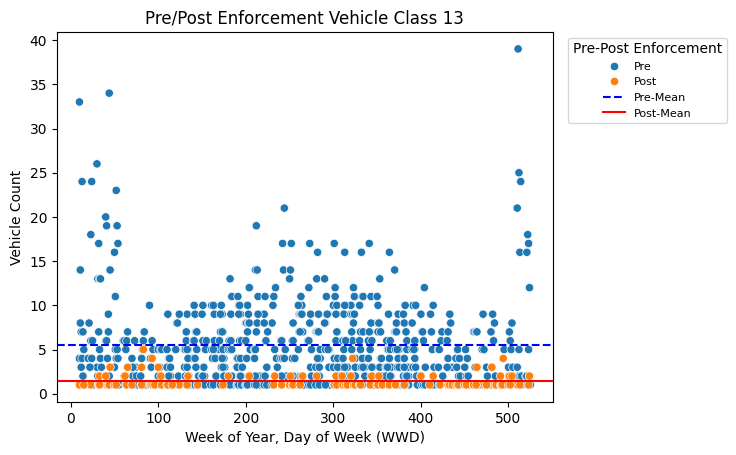

In [359]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 13] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "week_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Week of Year, Day of Week (WWD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 13")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [360]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    627.000000
mean       5.526316
std        4.894464
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       39.000000
Name: class_count, dtype: float64

In [361]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    120.000000
mean       1.408333
std        0.772379
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: class_count, dtype: float64

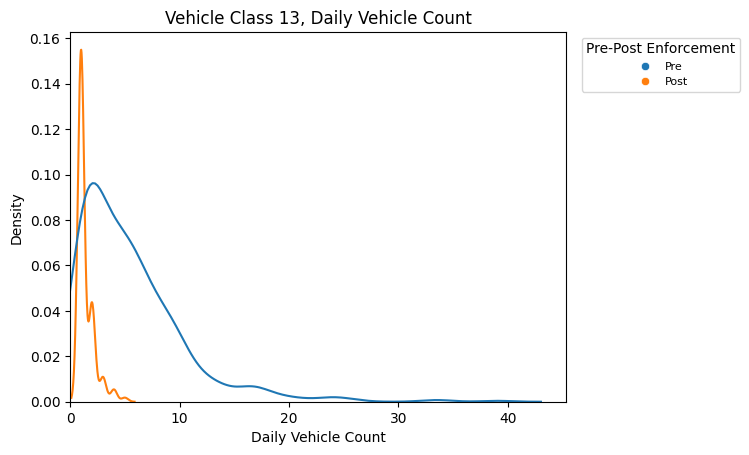

In [362]:
veh_pdf = sns.kdeplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Density")
veh_pdf.set_title("Vehicle Class 13, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.xlim(0, None)
plt.show()

In [363]:
#Kolmogorov-Smirnov Two Sample Test
#Checks if two samples come from same distribution

pre_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].values
post_daily_veh_counts = filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].values

# Run two-sample KS test
statistic, p_value = ks_2samp(pre_daily_veh_counts, post_daily_veh_counts)

print("KS Statistic:", statistic) #maximum distance between the CDFs of the two distributions
print("P-value:", p_value) 
"""
Likelihood that this KS statistic would be observed if these two samples came from the same distribution

For this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null

*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence
to show that its not.
"""

KS Statistic: 0.6008771929824561
P-value: 8.186971049685886e-35


'\nLikelihood that this KS statistic would be observed if these two samples came from the same distribution\n\nFor this test we are assuming a typical significance level of alpha = 0.05 to reject or fail to reject the null\n\n*Note failing to reject the Null Hypothesis does not mean the null is true, just that there is not enough evidence\nto show that its not.\n'

In [236]:
pre2_post2_df.to_csv("Data/Pre_Post_Enforcement/QB_pre_post_2year_period.csv", index=False)

Simple Daily Count Time Series By Class

Queens Bound

In [87]:
import pandas as pd

In [81]:
df1 = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
df2 = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")

df2.head()

direction  year  month  day  class  class_count  year_month_date_type_int  \
0        QB    23     11   13      4          208                    231113   
1        QB    23     11   13     11           20                    231113   
2        QB    23     11   13      9         1554                    231113   
3        QB    23     11   13      2        33659                    231113   
4        QB    23     11   13      6          713                    231113   

  year_month_date  week_day  
0      2023-11-13       460  
1      2023-11-13       460  
2      2023-11-13       460  
3      2023-11-13       460  
4      2023-11-13       460

In [82]:
df3 = pd.concat([df1,df2],ignore_index=True)

df3

direction  year  month  day  class  class_count  \
0            QB    19     10   16      5         1969   
1            QB    19     10   16     12            2   
2            QB    19     10   16     13            7   
3            QB    19     10   16      9         1866   
4            QB    19     10   16      3         7056   
...         ...   ...    ...  ...    ...          ...   
23781        QB    25      3   31      9          711   
23782        QB    25      3   31      8           87   
23783        QB    25      3   31     11            9   
23784        QB    25      3   31      3         2016   
23785        QB    25      3   31      5         1872   

       year_month_date_type_int year_month_date  week_day  
0                        191016      2019-10-16       422  
1                        191016      2019-10-16       422  
2                        191016      2019-10-16       422  
3                        191016      2019-10-16       422  
4                        191016      2019-10-16       422  
...                         ...             ...       ...  
23781                    250331      2025-03-31       140  
23782                    250331      2025-03-31       140  
23783                    250331      2025-03-31       140  
23784                    250331      2025-03-31       140  
23785                    250331      2025-03-31       140  

[23786 rows x 9 columns]

In [83]:
df3["year_month_date"] = pd.to_datetime(df3["year_month_date_type_int"], format= r"%y%m%d")

df3

direction  year  month  day  class  class_count  \
0            QB    19     10   16      5         1969   
1            QB    19     10   16     12            2   
2            QB    19     10   16     13            7   
3            QB    19     10   16      9         1866   
4            QB    19     10   16      3         7056   
...         ...   ...    ...  ...    ...          ...   
23781        QB    25      3   31      9          711   
23782        QB    25      3   31      8           87   
23783        QB    25      3   31     11            9   
23784        QB    25      3   31      3         2016   
23785        QB    25      3   31      5         1872   

       year_month_date_type_int year_month_date  week_day  
0                        191016      2019-10-16       422  
1                        191016      2019-10-16       422  
2                        191016      2019-10-16       422  
3                        191016      2019-10-16       422  
4                        191016      2019-10-16       422  
...                         ...             ...       ...  
23781                    250331      2025-03-31       140  
23782                    250331      2025-03-31       140  
23783                    250331      2025-03-31       140  
23784                    250331      2025-03-31       140  
23785                    250331      2025-03-31       140  

[23786 rows x 9 columns]

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

Class 1

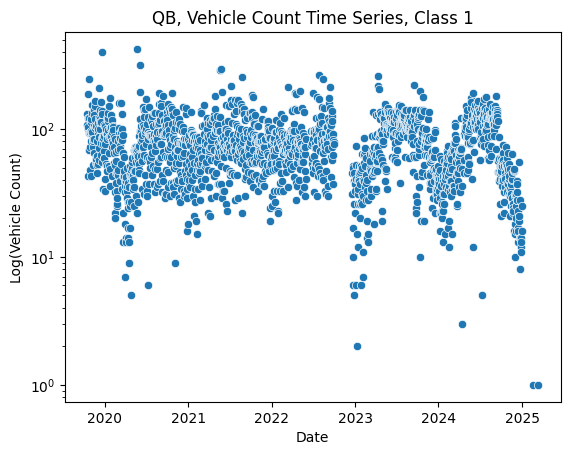

In [85]:
filtered_df3 = df3[df3["class"] == 1]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 1")

plt.show()

Class 2

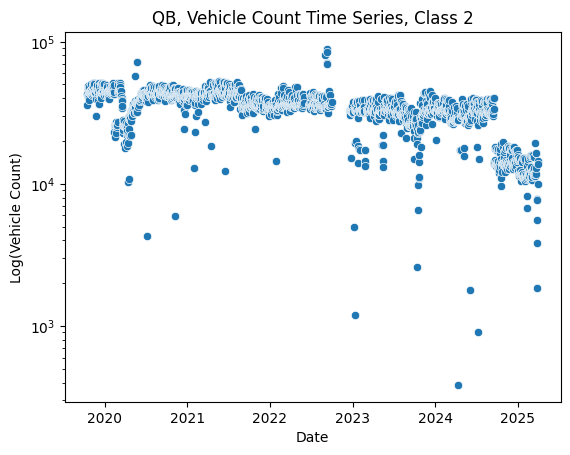

In [86]:
filtered_df3 = df3[df3["class"] == 2]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 2")

plt.show()

Class 3

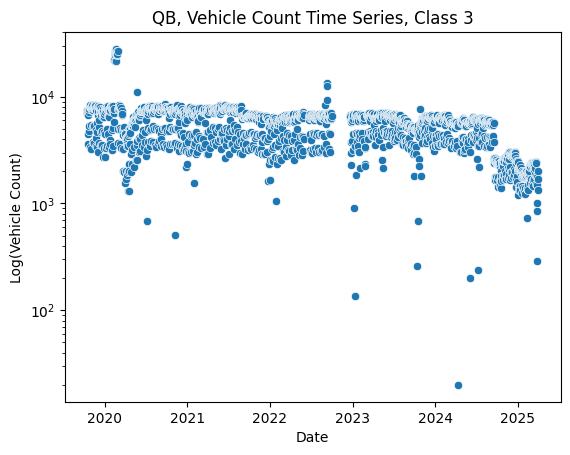

In [87]:
filtered_df3 = df3[df3["class"] == 3]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 3")

plt.show()

Class 4

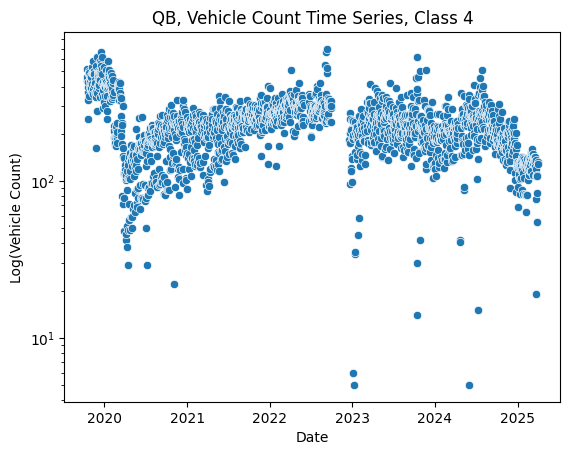

In [88]:
filtered_df3 = df3[df3["class"] == 4]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 4")

plt.show()

Class 5

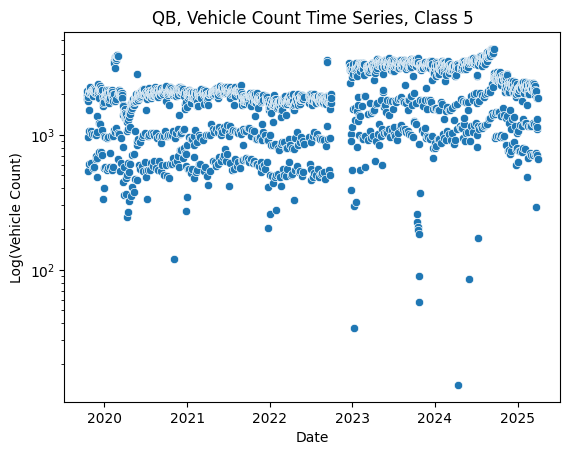

In [89]:
filtered_df3 = df3[df3["class"] == 5]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 5")

plt.show()

Class 6

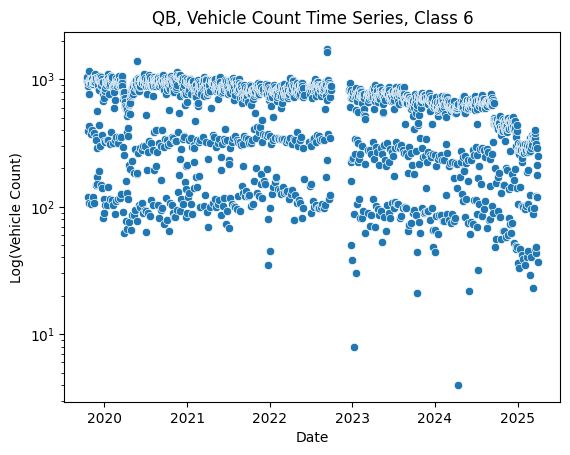

In [90]:
filtered_df3 = df3[df3["class"] == 6]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 6")

plt.show()

Class 7

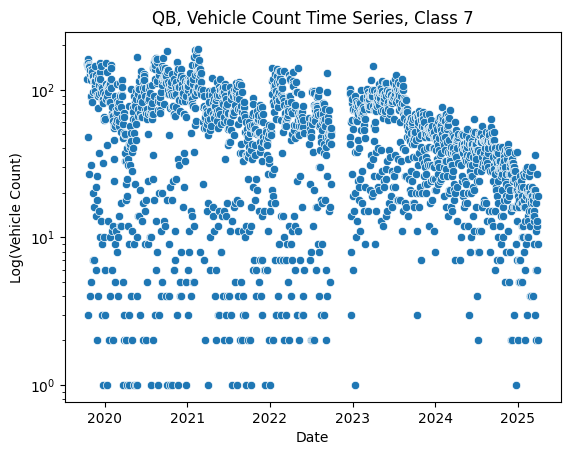

In [91]:
filtered_df3 = df3[df3["class"] == 7]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 7")

plt.show()

Class 8

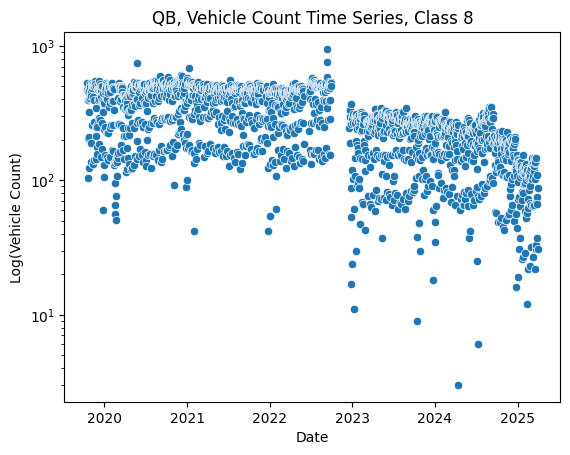

In [92]:
filtered_df3 = df3[df3["class"] == 8]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 8")

plt.show()

Class 9

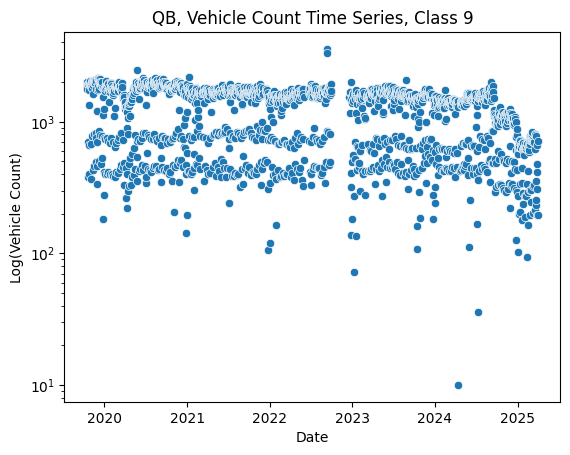

In [93]:
filtered_df3 = df3[df3["class"] == 9]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 9")

plt.show()

Class 10

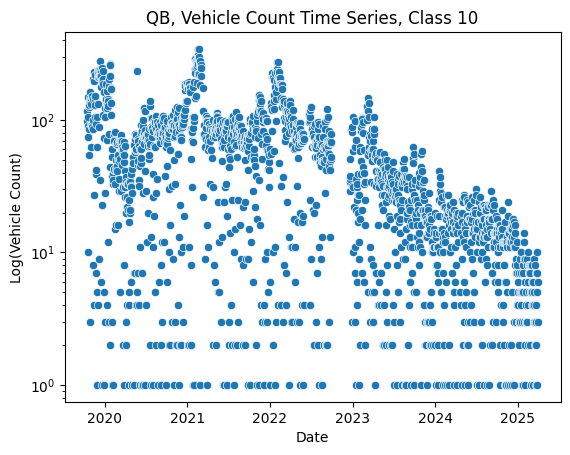

In [94]:
filtered_df3 = df3[df3["class"] == 10]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 10")

plt.show()

Class 11

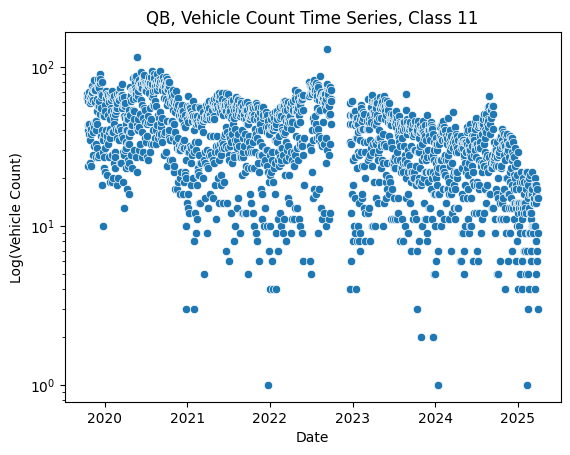

In [95]:
filtered_df3 = df3[df3["class"] == 11]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 11")

plt.show()

Class 12

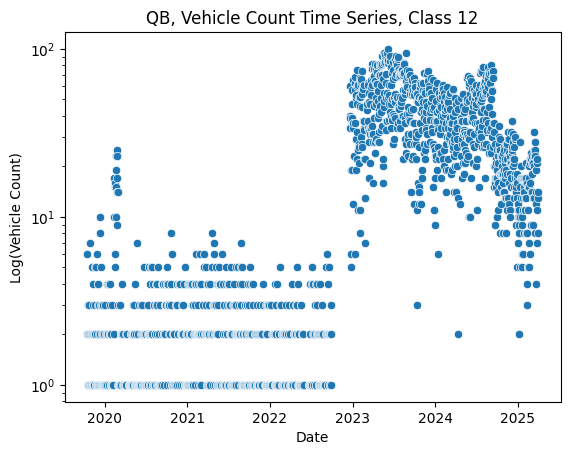

In [96]:
filtered_df3 = df3[df3["class"] == 12]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 12")

plt.show()

Class 13

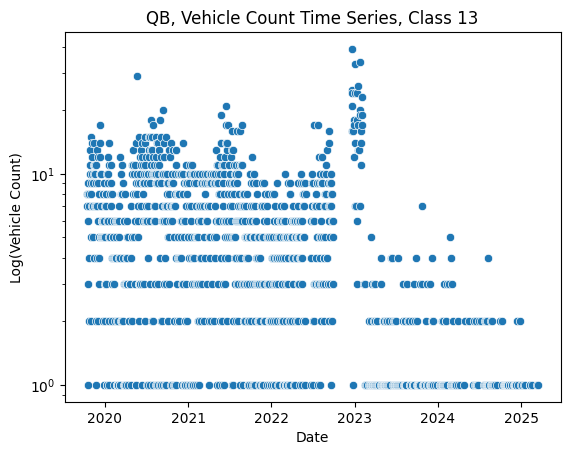

In [97]:
filtered_df3 = df3[df3["class"] == 13]

plot = sns.scatterplot(data=filtered_df3, x="year_month_date", y="class_count")
plt.yscale("log")


plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("QB, Vehicle Count Time Series, Class 13")

plt.show()

Staten Island Bound

In [108]:
df4 = pd.read_csv("./Data/Pre_Post_Enforcement/SIB_pre_enforcement.csv")
df4

direction  year  month  day  class  class_count  year_month_day
0          SIB    19     10   11     12          269          191011
1          SIB    19     10   11     14         7943          191011
2          SIB    19     10   11      5         1719          191011
3          SIB    19     10   11      6          798          191011
4          SIB    19     10   11      1         2755          191011
...        ...   ...    ...  ...    ...          ...             ...
5685       SIB    20     12   31      8           72          201231
5686       SIB    20     12   31      7           13          201231
5687       SIB    20     12   31     11            2          201231
5688       SIB    20     12   31      3         3394          201231
5689       SIB    20     12   31      5          262          201231

[5690 rows x 7 columns]

In [109]:
df4["year_month_date"] = pd.to_datetime(df4["year_month_day"], format= r"%y%m%d")

In [110]:
df4["class"].unique() 

array([12, 14,  5,  6,  1,  9,  8, 13,  7,  4,  3, 11, 10,  2])

Class 1

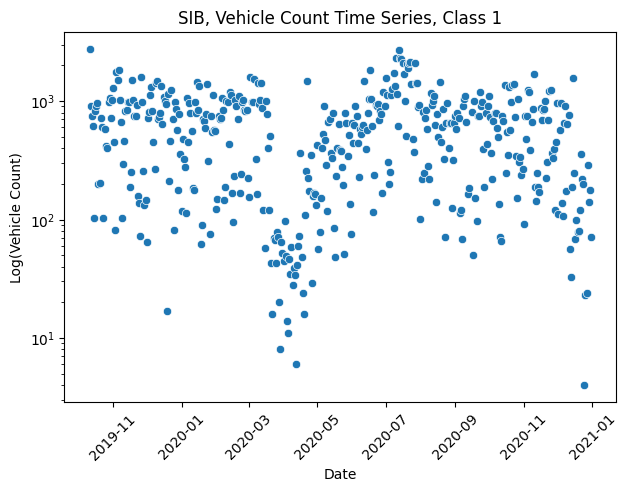

In [111]:
filtered_df4 = df4[df4["class"] == 1]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 1")


plt.show()

Class 2

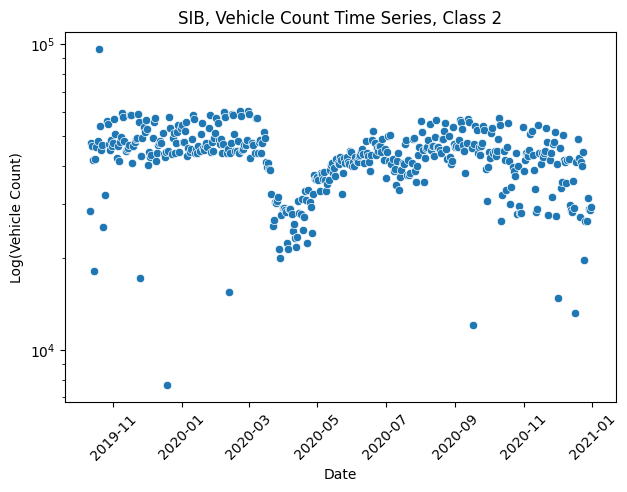

In [112]:
filtered_df4 = df4[df4["class"] == 2]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 2")


plt.show()

Class 3

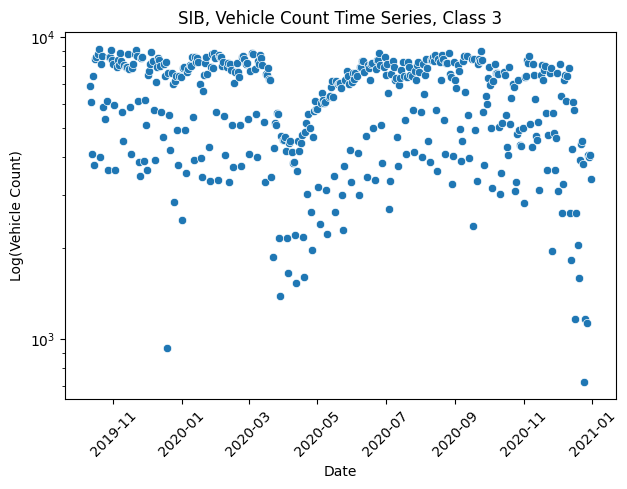

In [ ]:
filtered_df4 = df4[df4["class"] == 3]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 3")


plt.show()

Class 4

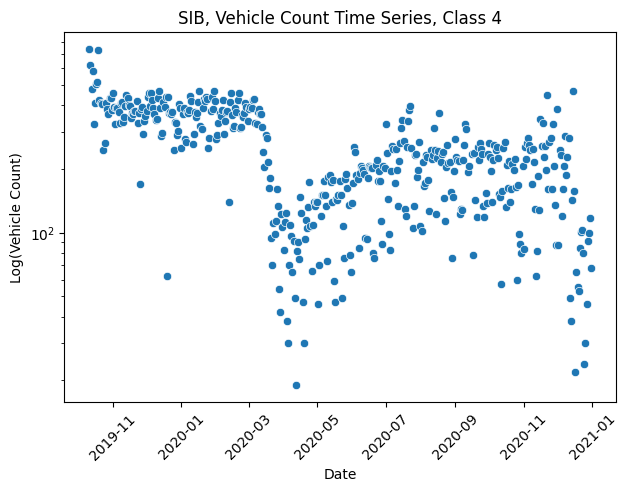

In [ ]:
filtered_df4 = df4[df4["class"] == 4]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 4")


plt.show()

Class 5

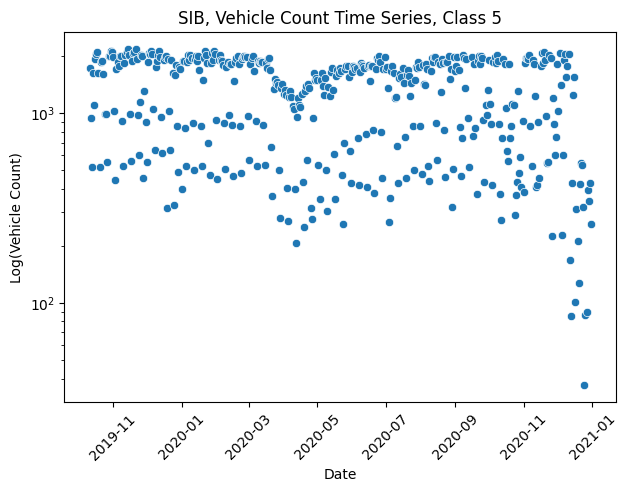

In [ ]:
filtered_df4 = df4[df4["class"] == 5]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 5")


plt.show()

Class 6

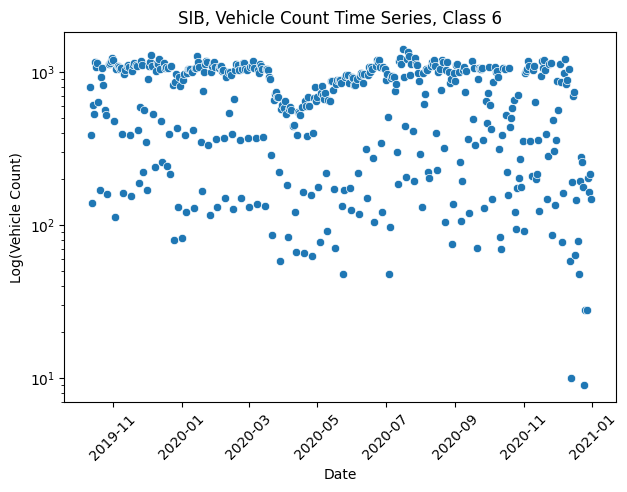

In [ ]:
filtered_df4 = df4[df4["class"] == 6]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 6")


plt.show()

Class 7

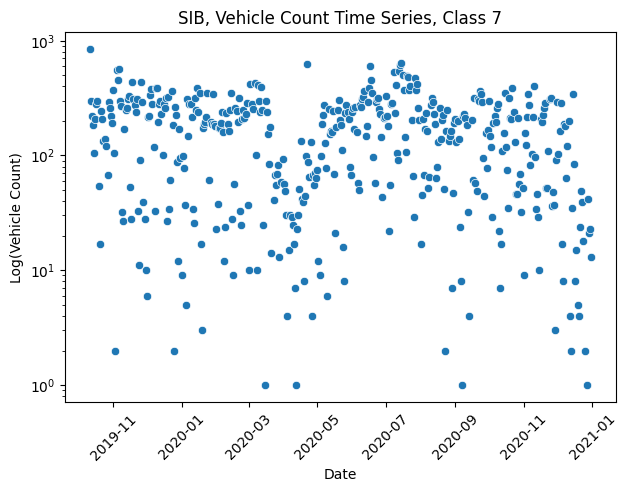

In [ ]:
filtered_df4 = df4[df4["class"] == 7]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 7")


plt.show()

Class 8

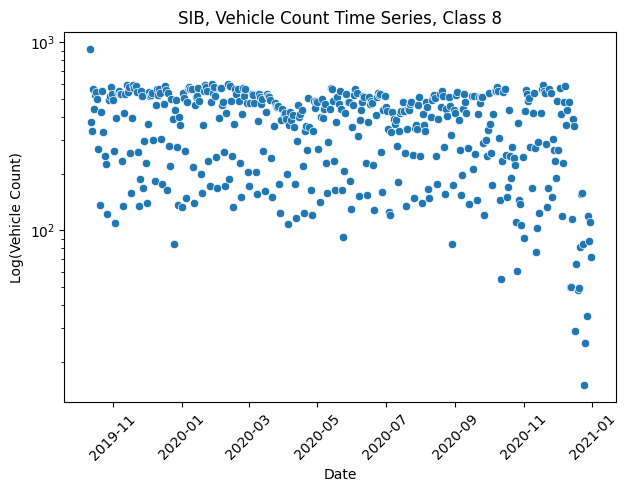

In [ ]:
filtered_df4 = df4[df4["class"] == 8]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 8")


plt.show()

Class 9

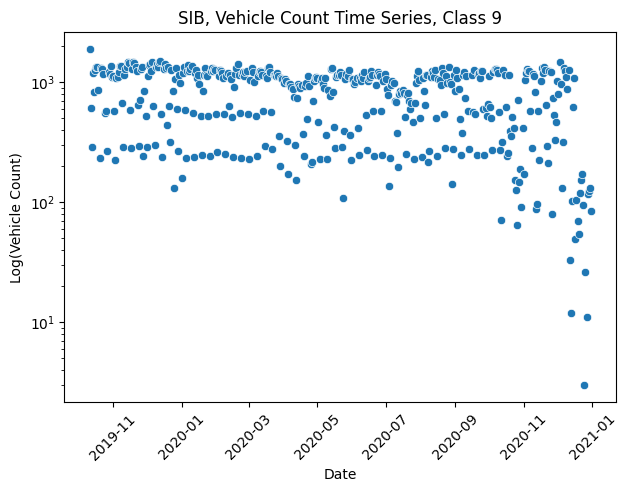

In [ ]:
filtered_df4 = df4[df4["class"] == 9]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 9")


plt.show()

Class 10

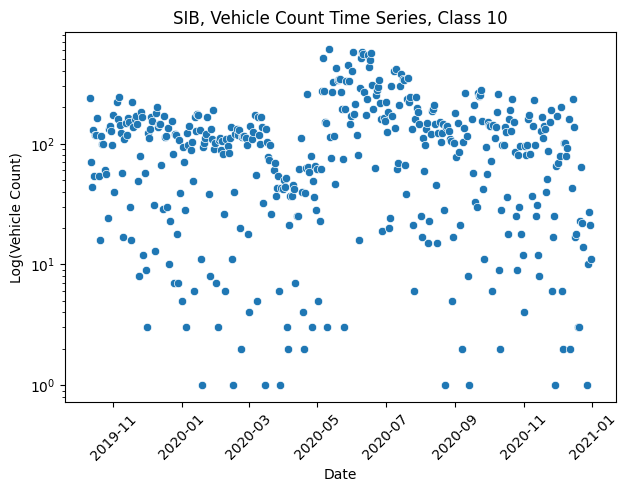

In [ ]:
filtered_df4 = df4[df4["class"] == 10]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 10")


plt.show()

Class 11

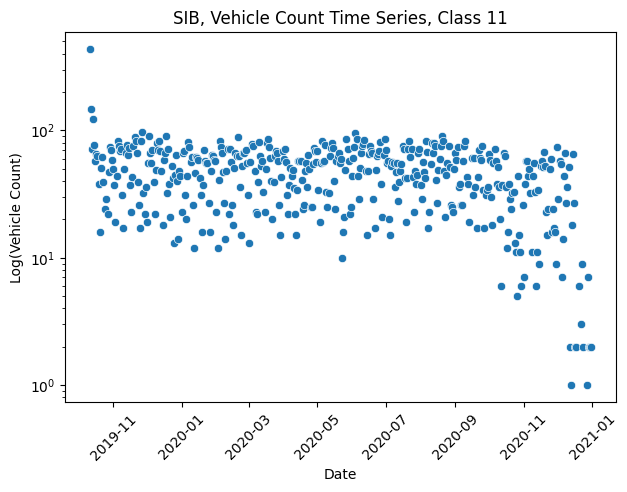

In [ ]:
filtered_df4 = df4[df4["class"] == 11]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 11")


plt.show()

Class 12

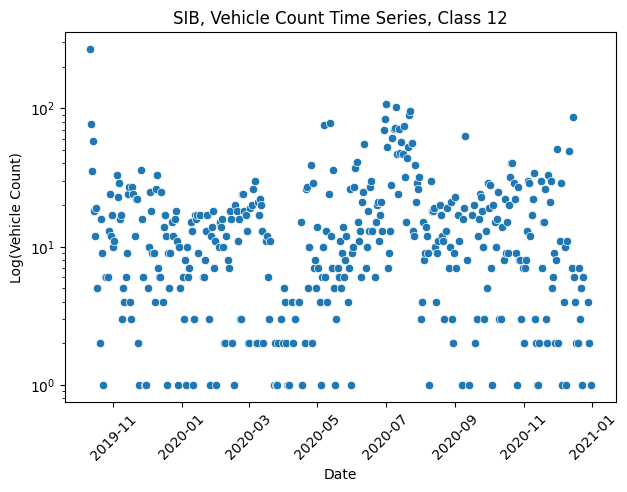

In [ ]:
filtered_df4 = df4[df4["class"] == 12]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 12")


plt.show()

Class 13

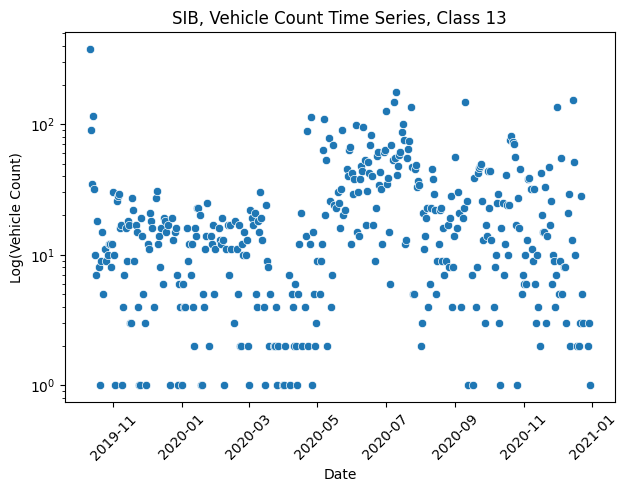

In [ ]:
filtered_df4 = df4[df4["class"] == 13]

plot = sns.scatterplot(data=filtered_df4, x="year_month_date", y="class_count")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()

plot.set_xlabel("Date")
plot.set_ylabel("Log(Vehicle Count)")
plot.set_title("SIB, Vehicle Count Time Series, Class 13")


plt.show()

Data Transformation: Creating column that shows Day of Week, Week of Year (###)

In [ ]:
"""
This column will allow me to overlay different years. By having equivalent day of the week,
and week of the year this addresses issue of same dates corresponding to different days / weeks
this allows for better comparisons across years

"""

In [164]:
import pandas as pd

df1 = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
df2 = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")
df3 = pd.read_csv("./Data/Pre_Post_Enforcement/SIB_pre_enforcement.csv")

In [165]:
df3

direction  year  month  day  class  class_count  year_month_date_int  \
0          SIB    19     10   11     12          269               191011   
1          SIB    19     10   11     14         7943               191011   
2          SIB    19     10   11      5         1719               191011   
3          SIB    19     10   11      6          798               191011   
4          SIB    19     10   11      1         2755               191011   
...        ...   ...    ...  ...    ...          ...                  ...   
5685       SIB    20     12   31      8           72               201231   
5686       SIB    20     12   31      7           13               201231   
5687       SIB    20     12   31     11            2               201231   
5688       SIB    20     12   31      3         3394               201231   
5689       SIB    20     12   31      5          262               201231   

     year_month_date  day_week  
0         2019-10-11       414  
1         2019-10-11       414  
2         2019-10-11       414  
3         2019-10-11       414  
4         2019-10-11       414  
...              ...       ...  
5685      2020-12-31       533  
5686      2020-12-31       533  
5687      2020-12-31       533  
5688      2020-12-31       533  
5689      2020-12-31       533  

[5690 rows x 9 columns]

In [118]:
df2

direction  year  month  day  class  class_count  \
0           QB    23     11   13      4          208   
1           QB    23     11   13     11           20   
2           QB    23     11   13      9         1554   
3           QB    23     11   13      2        33659   
4           QB    23     11   13      6          713   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  day_week  
0                       231113      2023-11-13       460  
1                       231113      2023-11-13       460  
2                       231113      2023-11-13       460  
3                       231113      2023-11-13       460  
4                       231113      2023-11-13       460  
...                        ...             ...       ...  
6423                    250331      2025-03-31       140  
6424                    250331      2025-03-31       140  
6425                    250331      2025-03-31       140  
6426                    250331      2025-03-31       140  
6427                    250331      2025-03-31       140  

[6428 rows x 9 columns]

In [166]:
df3.rename(columns={"year_month_day":"year_month_date_int"}, inplace=True)

In [167]:
# If your column might already be a string
df3['year_month_date'] = df3['year_month_date_int'].apply(lambda x: pd.to_datetime(f"20{x:06d}", format='%Y%m%d'))

In [168]:
df3

direction  year  month  day  class  class_count  year_month_date_int  \
0          SIB    19     10   11     12          269               191011   
1          SIB    19     10   11     14         7943               191011   
2          SIB    19     10   11      5         1719               191011   
3          SIB    19     10   11      6          798               191011   
4          SIB    19     10   11      1         2755               191011   
...        ...   ...    ...  ...    ...          ...                  ...   
5685       SIB    20     12   31      8           72               201231   
5686       SIB    20     12   31      7           13               201231   
5687       SIB    20     12   31     11            2               201231   
5688       SIB    20     12   31      3         3394               201231   
5689       SIB    20     12   31      5          262               201231   

     year_month_date  day_week  
0         2019-10-11       414  
1         2019-10-11       414  
2         2019-10-11       414  
3         2019-10-11       414  
4         2019-10-11       414  
...              ...       ...  
5685      2020-12-31       533  
5686      2020-12-31       533  
5687      2020-12-31       533  
5688      2020-12-31       533  
5689      2020-12-31       533  

[5690 rows x 9 columns]

In [169]:
df_list = [df1, df2, df3]

In [170]:
for df in df_list:
    df["year_month_date"] = pd.to_datetime(df["year_month_date"])
    print("done")

done
done
done


In [171]:
def day_wk_extractor(df_row):
    date = df_row.loc["year_month_date"]
    
    wk_yr = str(date.isocalendar().week).zfill(2)
    
    day_wk = str(date.dayofweek)
    
    return wk_yr + day_wk


In [152]:
day_wk_extractor(df1.iloc[0,:])

'422'

In [172]:
for df in df_list:
    df["week_day"] = df.apply(day_wk_extractor, axis=1)
    print("done")

done
done
done


In [173]:
df1

direction  year  month  day  class  class_count  \
0            QB    19     10   16      5         1969   
1            QB    19     10   16     12            2   
2            QB    19     10   16     13            7   
3            QB    19     10   16      9         1866   
4            QB    19     10   16      3         7056   
...         ...   ...    ...  ...    ...          ...   
17353        QB    23     11   12      3         4261   
17354        QB    23     11   12      9          487   
17355        QB    23     11   12      6           90   
17356        QB    23     11   12      5         1032   
17357        QB    23     11   12      7           26   

       year_month_date_type_int year_month_date  day_week week_day  
0                        191016      2019-10-16       422      422  
1                        191016      2019-10-16       422      422  
2                        191016      2019-10-16       422      422  
3                        191016      2019-10-16       422      422  
4                        191016      2019-10-16       422      422  
...                         ...             ...       ...      ...  
17353                    231112      2023-11-12       456      456  
17354                    231112      2023-11-12       456      456  
17355                    231112      2023-11-12       456      456  
17356                    231112      2023-11-12       456      456  
17357                    231112      2023-11-12       456      456  

[17358 rows x 10 columns]

In [174]:
for df in df_list:
    df.rename(columns={"year_month_day":"year_month_date_type_int"}, inplace=True)
    print("done")

done
done
done


In [175]:
df2

direction  year  month  day  class  class_count  \
0           QB    23     11   13      4          208   
1           QB    23     11   13     11           20   
2           QB    23     11   13      9         1554   
3           QB    23     11   13      2        33659   
4           QB    23     11   13      6          713   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  day_week week_day  
0                       231113      2023-11-13       460      460  
1                       231113      2023-11-13       460      460  
2                       231113      2023-11-13       460      460  
3                       231113      2023-11-13       460      460  
4                       231113      2023-11-13       460      460  
...                        ...             ...       ...      ...  
6423                    250331      2025-03-31       140      140  
6424                    250331      2025-03-31       140      140  
6425                    250331      2025-03-31       140      140  
6426                    250331      2025-03-31       140      140  
6427                    250331      2025-03-31       140      140  

[6428 rows x 10 columns]

In [178]:
df1.to_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv", index=False)
df2.to_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv", index=False)
df3.to_csv("./Data/Pre_Post_Enforcement/SIB_pre_enforcement.csv", index=False)

Dynamic Time Warping , Pre-Post Enforcement Time Series Comparison

In [1]:
import pandas as pd
from tslearn.metrics import dtw
import numpy as np
from scipy.stats import ks_2samp

c:\Users\rubie\anaconda3\envs\Fall25_Capstone\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
pre_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
post_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")

pre_df = pre_df[(pre_df["year_month_date_type_int"] >= 210331) & (pre_df["year_month_date_type_int"] < 231113)] #pre_df2 filters for 2 year period before enforcement

In [3]:
pre_df

direction  year  month  day  class  class_count  \
6591         QB    21      3   31      7           59   
6592         QB    21      3   31      6          829   
6593         QB    21      3   31     12            1   
6594         QB    21      3   31     11           55   
6595         QB    21      3   31      5         2001   
...         ...   ...    ...  ...    ...          ...   
17353        QB    23     11   12      3         4261   
17354        QB    23     11   12      9          487   
17355        QB    23     11   12      6           90   
17356        QB    23     11   12      5         1032   
17357        QB    23     11   12      7           26   

       year_month_date_type_int year_month_date  week_day  
6591                     210331      2021-03-31       132  
6592                     210331      2021-03-31       132  
6593                     210331      2021-03-31       132  
6594                     210331      2021-03-31       132  
6595                     210331      2021-03-31       132  
...                         ...             ...       ...  
17353                    231112      2023-11-12       456  
17354                    231112      2023-11-12       456  
17355                    231112      2023-11-12       456  
17356                    231112      2023-11-12       456  
17357                    231112      2023-11-12       456  

[10767 rows x 9 columns]

In [4]:
post_df

direction  year  month  day  class  class_count  \
0           QB    23     11   13      4          208   
1           QB    23     11   13     11           20   
2           QB    23     11   13      9         1554   
3           QB    23     11   13      2        33659   
4           QB    23     11   13      6          713   
...        ...   ...    ...  ...    ...          ...   
6423        QB    25      3   31      9          711   
6424        QB    25      3   31      8           87   
6425        QB    25      3   31     11            9   
6426        QB    25      3   31      3         2016   
6427        QB    25      3   31      5         1872   

      year_month_date_type_int year_month_date  week_day  
0                       231113      2023-11-13       460  
1                       231113      2023-11-13       460  
2                       231113      2023-11-13       460  
3                       231113      2023-11-13       460  
4                       231113      2023-11-13       460  
...                        ...             ...       ...  
6423                    250331      2025-03-31       140  
6424                    250331      2025-03-31       140  
6425                    250331      2025-03-31       140  
6426                    250331      2025-03-31       140  
6427                    250331      2025-03-31       140  

[6428 rows x 9 columns]

In [ ]:
#Normalizing daily vehicle count to span 0 -> 1 for better comparison

pre_df["Norm Daily Vehicle Count"] = (
    (pre_df["class_count"] - pre_df["class_count"].min()) /
    (pre_df["class_count"].max() - pre_df["class_count"].min())
)

post_df["Norm Daily Vehicle Count"] = (
    (post_df["class_count"] - post_df["class_count"].min()) /
    (post_df["class_count"].max() - post_df["class_count"].min())
)

In [13]:
veh_class = []
dtw_scores = []
scores_df = {"Vehicle Class" : [], "DTW Score" : []}

for i in range(1,14):
    pre_df_filtered_veh_count = pre_df.loc[pre_df["class"]==i]["Norm Daily Vehicle Count"].values
    post_df_filtered_veh_count = post_df.loc[post_df["class"]==i]["Norm Daily Vehicle Count"].values

    score = dtw(pre_df_filtered_veh_count, post_df_filtered_veh_count)
    veh_class.append(i)
    dtw_scores.append(score)

scores_df["Vehicle Class"] = veh_class
scores_df["DTW Score"] = dtw_scores



In [14]:
scores_df = pd.DataFrame(scores_df)

In [15]:
scores_df

Vehicle Class  DTW Score
0               1   0.012379
1               2   3.150720
2               3   0.707600
3               4   0.029400
4               5   0.600596
5               6   0.091513
6               7   0.007296
7               8   0.025302
8               9   0.228777
9              10   0.012293
10             11   0.004101
11             12   0.008844
12             13   0.001131

In [16]:
#The cost function used by DTW is the Euclidean distance, to get the actual difference between the two time series
#I need to take square root

def square_root(row):
    return np.sqrt(row["DTW Score"])

In [17]:
square_root(scores_df.iloc[0,:])

np.float64(0.11126207819474777)

In [18]:
scores_df["Sqrt(DTW Score)"] = scores_df.apply(square_root, axis =  1)

In [19]:
scores_df = scores_df.sort_values("Sqrt(DTW Score)")
scores_df

Vehicle Class  DTW Score  Sqrt(DTW Score)
12             13   0.001131         0.033635
10             11   0.004101         0.064036
6               7   0.007296         0.085417
11             12   0.008844         0.094041
9              10   0.012293         0.110872
0               1   0.012379         0.111262
7               8   0.025302         0.159068
3               4   0.029400         0.171465
5               6   0.091513         0.302511
8               9   0.228777         0.478306
4               5   0.600596         0.774982
2               3   0.707600         0.841190
1               2   3.150720         1.775027

Kolmogorov Smirnov Two Sample Test

In [78]:
veh_class = []
ks_stats = []
p_vals = []
KS_test = {"Vehicle Class" : [], "KS statistic" : [], "KS statistic p_value" : [] }

for i in range(1,14):
    pre_df_filtered_veh_count = pre_df.loc[pre_df["class"]==i]["class_count"].values
    post_df_filtered_veh_count = post_df.loc[post_df["class"]==i]["class_count"].values

    statistic, p_value = ks_2samp(pre_df_filtered_veh_count, post_df_filtered_veh_count)
    veh_class.append(i)
    ks_stats.append(statistic)
    p_vals.append(p_value)

KS_test["Vehicle Class"] = veh_class
KS_test["KS statistic"] = ks_stats
KS_test["KS statistic p_value"] = p_vals

In [79]:
KS_test_df = pd.DataFrame(KS_test)

KS_test_df

Vehicle Class  KS statistic  KS statistic p_value
0               1      0.239992          2.223968e-14
1               2      0.494073          1.111842e-69
2               3      0.366604          8.638561e-38
3               4      0.379716          1.597960e-40
4               5      0.358785          3.594820e-36
5               6      0.546057          5.804328e-86
6               7      0.479219          4.063642e-65
7               8      0.508927          3.912269e-74
8               9      0.397501          1.548231e-44
9              10      0.656726         7.386213e-119
10             11      0.397907          1.709644e-44
11             12      0.509165          1.992598e-68
12             13      0.600877          8.186971e-35